## Model Arch

In [37]:
import torch.optim

from models import Lusch
from models2 import Lusch_mixing
from data_generator import load_dataset,differential_dataset
from loss_functions import koopman_loss,prediction_loss
from torch.utils.data import DataLoader
from tqdm import tqdm
import numpy as np
# Press the green button in the gutter to run the script.

In [38]:
koopman_dim = 16
# update hidden dimesnion to 500 for MLP and 20-50 for KAN network
hidden_dim = 50
input_dim = 6
delta_t = 0.01
epochs = 100
lr = 1e-3
Sp =72; horizon = 72; T = max(horizon,Sp)
batch_size = 64
load_chkpt = False
chkpt_filename = "fixed_matrix_checkk"
save_every = 5
start_epoch = 1
device="cpu"
arch = "kan"
type = "fixed"
if type == "fixed":
        number_cj = 1  # number of koopman operators constructed from complex conjugate pairs
        number_real = 0 # number of koopman operators contructed from real eigenvalues
        model = Lusch(input_dim,koopman_dim,hidden_dim = hidden_dim,delta_t=delta_t,device=device,arch=arch,n_com=number_cj,n_real=number_real).to(device)
else:
        number_cj = 16 # number of complex conjugate pairs
        if number_cj * 2 > koopman_dim:
            raise ValueError("Number of complex conjugate pairs is greater than koopman dimension")
        number_real = koopman_dim - number_cj * 2 # number of koopman operators contructed from real eigenvalues
        model = Lusch_mixing(input_dim,koopman_dim,hidden_dim = hidden_dim,delta_t=delta_t,device=device,arch=arch,n_com=number_cj,n_real=number_real).to(device)

optimizer = torch.optim.Adam(model.parameters(),lr=lr)

## Loading the Model

In [39]:
print("LOAD CHECKPOINTS")
state_dicts = torch.load(chkpt_filename+".pth")
model.load_state_dict(state_dicts['model'])
optimizer.load_state_dict(state_dicts['optimizer'])
start_epoch=state_dicts["start_epoch"]
print(state_dicts["start_epoch"])
print(state_dicts.keys())

LOAD CHECKPOINTS
100
dict_keys(['model', 'optimizer', 'start_epoch'])


/var/folders/5_/hq2ly88s2fxbtph44558kg8m0000gn/T/ipykernel_32118/3611107454.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dicts = torch.load(chkpt_filename+".pth

In [40]:
print(model.koopman.complex_pairs_models[0].fc.layers[0].plot_curve(0, 1, num_pts=1000, num_extrapolate_bins=3))

(tensor([-3.9474, -3.9395, -3.9316, -3.9237, -3.9158, -3.9079, -3.9000, -3.8921,
        -3.8841, -3.8762, -3.8683, -3.8604, -3.8525, -3.8446, -3.8367, -3.8288,
        -3.8209, -3.8130, -3.8051, -3.7972, -3.7893, -3.7814, -3.7735, -3.7656,
        -3.7577, -3.7498, -3.7419, -3.7340, -3.7261, -3.7182, -3.7103, -3.7024,
        -3.6945, -3.6866, -3.6787, -3.6708, -3.6629, -3.6550, -3.6471, -3.6392,
        -3.6313, -3.6234, -3.6155, -3.6076, -3.5997, -3.5917, -3.5838, -3.5759,
        -3.5680, -3.5601, -3.5522, -3.5443, -3.5364, -3.5285, -3.5206, -3.5127,
        -3.5048, -3.4969, -3.4890, -3.4811, -3.4732, -3.4653, -3.4574, -3.4495,
        -3.4416, -3.4337, -3.4258, -3.4179, -3.4100, -3.4021, -3.3942, -3.3863,
        -3.3784, -3.3705, -3.3626, -3.3547, -3.3468, -3.3389, -3.3310, -3.3231,
        -3.3152, -3.3073, -3.2994, -3.2914, -3.2835, -3.2756, -3.2677, -3.2598,
        -3.2519, -3.2440, -3.2361, -3.2282, -3.2203, -3.2124, -3.2045, -3.1966,
        -3.1887, -3.1808, -3.1729, -3.1

<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
/var/folders/5_/hq2ly88s2fxbtph44558kg8m0000gn/T/ipykernel_32118/1633392250.py:9: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel("$\phi_{p,q}(x)$")


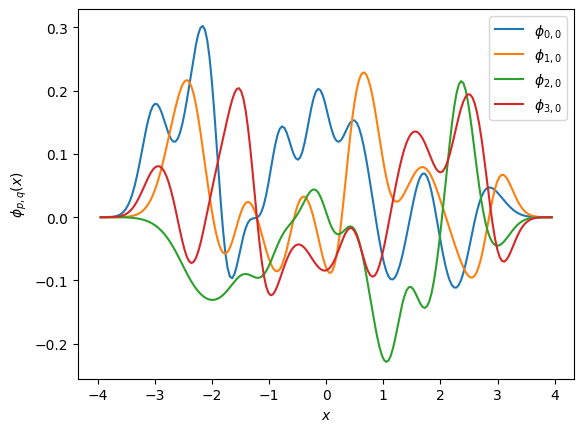

In [41]:
import matplotlib.pyplot as plt
d_in = 4
d_out = 1
for i in range(d_in):
    for j in range(d_out):
        x, y = model.koopman.complex_pairs_models[0].fc.layers[0].plot_curve(i, j, 200, num_extrapolate_bins=3)
        plt.plot(x.numpy(), y.numpy(), label=r"$\phi_{" + f"{i},{j}" + r"}$")
plt.xlabel("$x$")
plt.ylabel("$\phi_{p,q}(x)$")
plt.legend(loc="upper right")

<>:9: SyntaxWarning: invalid escape sequence '\p'
<>:9: SyntaxWarning: invalid escape sequence '\p'
/var/folders/5_/hq2ly88s2fxbtph44558kg8m0000gn/T/ipykernel_32118/3895094450.py:9: SyntaxWarning: invalid escape sequence '\p'
  plt.ylabel("$\phi_{p,q}(x)$")


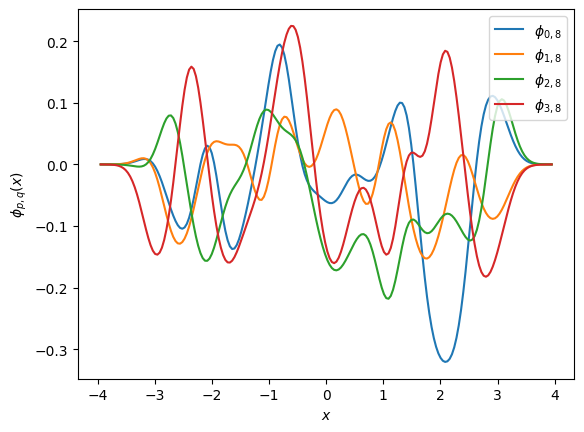

In [42]:
import matplotlib.pyplot as plt
d_in = 4
d_out = 8
for i in range(d_in):
    for j in [8]:
        x, y = model.koopman.complex_pairs_models[0].fc.layers[0].plot_curve(i, j, 200, num_extrapolate_bins=3)
        plt.plot(x.numpy(), y.numpy(), label=r"$\phi_{" + f"{i},{j}" + r"}$")
plt.xlabel("$x$")
plt.ylabel("$\phi_{p,q}(x)$")
plt.legend(loc="upper right")

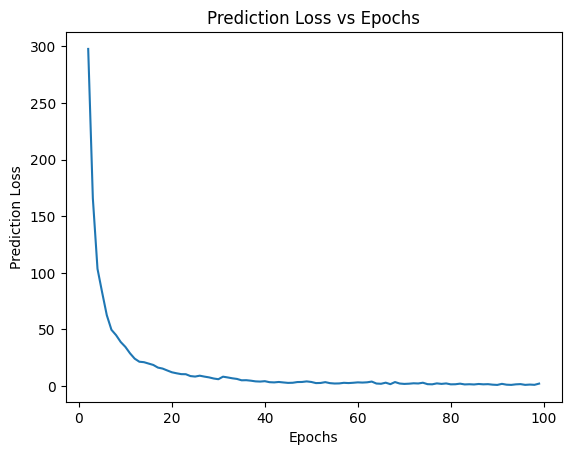

In [45]:
''' make this data in list and plot each value against the epoch
==========  EPOCH 2  ==========

Prediction Loss: 297.7825
TRAIN LOSS:  1359.8502464294434
TEST LOSS:  912.2619476318359

 ==========  EPOCH 3  ==========

Prediction Loss: 165.8616
TRAIN LOSS:  775.0784683227539
TEST LOSS:  593.4991760253906

 ==========  EPOCH 4  ==========

Prediction Loss: 103.5353
TRAIN LOSS:  520.1754627227783
TEST LOSS:  411.45418548583984

 ==========  EPOCH 5  ==========

Prediction Loss: 82.6810
TRAIN LOSS:  395.09701919555664
TEST LOSS:  341.90111541748047

 ==========  EPOCH 6  ==========

Prediction Loss: 62.5607
TRAIN LOSS:  341.8472828865051
TEST LOSS:  271.986026763916

 ==========  EPOCH 7  ==========

Prediction Loss: 49.6757
TRAIN LOSS:  297.4433345794678
TEST LOSS:  206.23757553100586

 ==========  EPOCH 8  ==========

Prediction Loss: 44.9160
TRAIN LOSS:  260.35230112075806
TEST LOSS:  184.30109405517578

 ==========  EPOCH 9  ==========

Prediction Loss: 38.8530
TRAIN LOSS:  214.54960870742798
TEST LOSS:  178.2201042175293

 ==========  EPOCH 10  ==========

Prediction Loss: 34.5493
TRAIN LOSS:  182.15595054626465
TEST LOSS:  142.76830863952637

 ==========  EPOCH 11  ==========

Prediction Loss: 28.8606
TRAIN LOSS:  160.7161159515381
TEST LOSS:  168.38002967834473

 ==========  EPOCH 12  ==========

Prediction Loss: 24.1666
TRAIN LOSS:  155.06228590011597
TEST LOSS:  117.05750846862793

 ==========  EPOCH 13  ==========

Prediction Loss: 21.4580
TRAIN LOSS:  140.36647701263428
TEST LOSS:  102.89035987854004

 ==========  EPOCH 14  ==========

Prediction Loss: 21.0426
TRAIN LOSS:  123.45870280265808
TEST LOSS:  92.21183586120605

 ==========  EPOCH 15  ==========

Prediction Loss: 19.8170
TRAIN LOSS:  113.34476113319397
TEST LOSS:  99.32143783569336

 ==========  EPOCH 16  ==========

Prediction Loss: 18.6154
TRAIN LOSS:  118.90853071212769
TEST LOSS:  86.58443069458008

 ==========  EPOCH 17  ==========

Prediction Loss: 16.2687
TRAIN LOSS:  122.31198251247406
TEST LOSS:  89.60553550720215

 ==========  EPOCH 18  ==========

Prediction Loss: 15.4094
TRAIN LOSS:  95.30060052871704
TEST LOSS:  75.00798797607422

 ==========  EPOCH 19  ==========

Prediction Loss: 13.7435
TRAIN LOSS:  67.67591595649719
TEST LOSS:  84.70279884338379

 ==========  EPOCH 20  ==========

Prediction Loss: 12.1365
TRAIN LOSS:  72.19593548774719
TEST LOSS:  75.9019947052002

 ==========  EPOCH 21  ==========

Prediction Loss: 11.2549
TRAIN LOSS:  95.72330462932587
TEST LOSS:  118.90820217132568

 ==========  EPOCH 22  ==========

Prediction Loss: 10.4976
TRAIN LOSS:  77.26122760772705
TEST LOSS:  60.18925476074219

 ==========  EPOCH 23  ==========

Prediction Loss: 10.4113
TRAIN LOSS:  68.82870841026306
TEST LOSS:  99.98237609863281

 ==========  EPOCH 24  ==========

Prediction Loss: 8.7736
TRAIN LOSS:  75.5220959186554
TEST LOSS:  73.50394630432129

 ==========  EPOCH 25  ==========

Prediction Loss: 8.3443
TRAIN LOSS:  73.79022014141083
TEST LOSS:  107.39647674560547

 ==========  EPOCH 26  ==========

Prediction Loss: 9.1206
TRAIN LOSS:  74.39322698116302
TEST LOSS:  55.00831413269043

 ==========  EPOCH 27  ==========

Prediction Loss: 8.3080
TRAIN LOSS:  56.97512090206146
TEST LOSS:  47.129982471466064

 ==========  EPOCH 28  ==========

Prediction Loss: 7.6171
TRAIN LOSS:  75.72662127017975
TEST LOSS:  56.66227722167969

 ==========  EPOCH 29  ==========

Prediction Loss: 6.6250
TRAIN LOSS:  45.00430524349213
TEST LOSS:  60.00467014312744

 ==========  EPOCH 30  ==========

Prediction Loss: 6.0080
TRAIN LOSS:  53.65154391527176
TEST LOSS:  54.256855487823486

 ==========  EPOCH 31  ==========

Prediction Loss: 8.2428
TRAIN LOSS:  68.59337836503983
TEST LOSS:  41.70266675949097

 ==========  EPOCH 32  ==========

Prediction Loss: 7.5760
TRAIN LOSS:  81.51576590538025
TEST LOSS:  49.981496810913086

 ==========  EPOCH 33  ==========

Prediction Loss: 6.8192
TRAIN LOSS:  61.79215705394745
TEST LOSS:  68.21814155578613

 ==========  EPOCH 34  ==========

Prediction Loss: 6.2562
TRAIN LOSS:  56.29206019639969
TEST LOSS:  56.49169635772705

 ==========  EPOCH 35  ==========

Prediction Loss: 5.0503
TRAIN LOSS:  54.970961928367615
TEST LOSS:  60.40509510040283

 ==========  EPOCH 36  ==========

Prediction Loss: 5.1394
TRAIN LOSS:  42.68757086992264
TEST LOSS:  39.93470048904419

 ==========  EPOCH 37  ==========

Prediction Loss: 4.7000
TRAIN LOSS:  62.386430859565735
TEST LOSS:  44.023197174072266

 ==========  EPOCH 38  ==========

Prediction Loss: 4.1053
TRAIN LOSS:  44.524605333805084
TEST LOSS:  28.85991668701172

 ==========  EPOCH 39  ==========

Prediction Loss: 3.9185
TRAIN LOSS:  34.84390115737915
TEST LOSS:  35.8462610244751

 ==========  EPOCH 40  ==========

Prediction Loss: 4.2658
TRAIN LOSS:  40.31358343362808
TEST LOSS:  43.59391975402832

 ==========  EPOCH 41  ==========

Prediction Loss: 3.3844
TRAIN LOSS:  35.491828709840775
TEST LOSS:  86.74929618835449

 ==========  EPOCH 42  ==========

Prediction Loss: 3.1901
TRAIN LOSS:  26.104163616895676
TEST LOSS:  31.310481309890747

 ==========  EPOCH 43  ==========

Prediction Loss: 3.5680
TRAIN LOSS:  48.497543662786484
TEST LOSS:  32.48736572265625

 ==========  EPOCH 44  ==========

Prediction Loss: 3.1411
TRAIN LOSS:  31.012977123260498
TEST LOSS:  74.92207050323486

 ==========  EPOCH 45  ==========

Prediction Loss: 2.7583
TRAIN LOSS:  33.05111348628998
TEST LOSS:  25.284813404083252

 ==========  EPOCH 46  ==========

Prediction Loss: 2.8737
TRAIN LOSS:  25.91766420006752
TEST LOSS:  21.680798530578613

 ==========  EPOCH 47  ==========

Prediction Loss: 3.5004
TRAIN LOSS:  37.407663345336914
TEST LOSS:  38.16541862487793

 ==========  EPOCH 48  ==========

Prediction Loss: 3.5759
TRAIN LOSS:  43.02510342001915
TEST LOSS:  28.31937837600708

 ==========  EPOCH 49  ==========

Prediction Loss: 4.0732
TRAIN LOSS:  48.16124740242958
TEST LOSS:  20.29938507080078

 ==========  EPOCH 50  ==========

Prediction Loss: 3.5709
TRAIN LOSS:  36.397260308265686
TEST LOSS:  21.28334331512451

 ==========  EPOCH 51  ==========

Prediction Loss: 2.5791
TRAIN LOSS:  43.97363618016243
TEST LOSS:  40.14959144592285

 ==========  EPOCH 52  ==========

Prediction Loss: 2.6945
TRAIN LOSS:  22.289058923721313
TEST LOSS:  43.39755725860596

 ==========  EPOCH 53  ==========

Prediction Loss: 3.4178
TRAIN LOSS:  35.93900275230408
TEST LOSS:  28.105855464935303

 ==========  EPOCH 54  ==========

Prediction Loss: 2.5364
TRAIN LOSS:  33.674707144498825
TEST LOSS:  29.347718715667725

 ==========  EPOCH 55  ==========

Prediction Loss: 2.2142
TRAIN LOSS:  21.75794979929924
TEST LOSS:  27.128170251846313

 ==========  EPOCH 56  ==========

Prediction Loss: 2.2920
TRAIN LOSS:  24.790666550397873
TEST LOSS:  12.697939395904541

 ==========  EPOCH 57  ==========

Prediction Loss: 2.8232
TRAIN LOSS:  27.121910274028778
TEST LOSS:  27.286446571350098

 ==========  EPOCH 58  ==========

Prediction Loss: 2.5987
TRAIN LOSS:  23.093332886695862
TEST LOSS:  14.285637140274048

 ==========  EPOCH 59  ==========

Prediction Loss: 2.8639
TRAIN LOSS:  25.523041039705276
TEST LOSS:  41.62363386154175

 ==========  EPOCH 60  ==========

Prediction Loss: 3.2180
TRAIN LOSS:  35.01562625169754
TEST LOSS:  50.95018243789673

 ==========  EPOCH 61  ==========

Prediction Loss: 3.0455
TRAIN LOSS:  36.32263374328613
TEST LOSS:  21.886406898498535

 ==========  EPOCH 62  ==========

Prediction Loss: 3.2667
TRAIN LOSS:  40.242792934179306
TEST LOSS:  21.35653805732727

 ==========  EPOCH 63  ==========

Prediction Loss: 3.9154
TRAIN LOSS:  42.473648726940155
TEST LOSS:  33.98701047897339

 ==========  EPOCH 64  ==========

Prediction Loss: 2.1919
TRAIN LOSS:  28.673148274421692
TEST LOSS:  28.07779812812805

 ==========  EPOCH 65  ==========

Prediction Loss: 1.9753
TRAIN LOSS:  21.328079134225845
TEST LOSS:  19.349434852600098

 ==========  EPOCH 66  ==========

Prediction Loss: 2.9439
TRAIN LOSS:  32.80038544535637
TEST LOSS:  25.13706398010254

 ==========  EPOCH 67  ==========

Prediction Loss: 1.6348
TRAIN LOSS:  20.193476527929306
TEST LOSS:  39.197081565856934

 ==========  EPOCH 68  ==========

Prediction Loss: 3.4965
TRAIN LOSS:  35.69547501206398
TEST LOSS:  29.044496774673462

 ==========  EPOCH 69  ==========

Prediction Loss: 2.1971
TRAIN LOSS:  26.720585346221924
TEST LOSS:  22.354233503341675

 ==========  EPOCH 70  ==========

Prediction Loss: 1.8566
TRAIN LOSS:  28.558429211378098
TEST LOSS:  16.505650281906128

 ==========  EPOCH 71  ==========

Prediction Loss: 2.0440
TRAIN LOSS:  25.806521773338318
TEST LOSS:  14.279027462005615

 ==========  EPOCH 72  ==========

Prediction Loss: 2.4049
TRAIN LOSS:  28.07292941212654
TEST LOSS:  14.627959966659546

 ==========  EPOCH 73  ==========

Prediction Loss: 2.2394
TRAIN LOSS:  30.932032108306885
TEST LOSS:  44.52495217323303

 ==========  EPOCH 74  ==========

Prediction Loss: 2.9035
TRAIN LOSS:  30.135199278593063
TEST LOSS:  14.17519497871399

 ==========  EPOCH 75  ==========

Prediction Loss: 1.6322
TRAIN LOSS:  21.160506457090378
TEST LOSS:  32.14025354385376

 ==========  EPOCH 76  ==========

Prediction Loss: 1.4949
TRAIN LOSS:  23.040726646780968
TEST LOSS:  13.824102640151978

 ==========  EPOCH 77  ==========

Prediction Loss: 2.3282
TRAIN LOSS:  25.247708961367607
TEST LOSS:  21.623476266860962

 ==========  EPOCH 78  ==========

Prediction Loss: 1.8658
TRAIN LOSS:  24.656688913702965
TEST LOSS:  12.300403833389282

 ==========  EPOCH 79  ==========

Prediction Loss: 2.2737
TRAIN LOSS:  32.72929635643959
TEST LOSS:  16.33335781097412

 ==========  EPOCH 80  ==========

Prediction Loss: 1.4784
TRAIN LOSS:  22.954844504594803
TEST LOSS:  11.961268424987793

 ==========  EPOCH 81  ==========

Prediction Loss: 1.5598
TRAIN LOSS:  37.083267360925674
TEST LOSS:  15.227168560028076

 ==========  EPOCH 82  ==========

Prediction Loss: 2.0783
TRAIN LOSS:  29.35358388721943
TEST LOSS:  20.983152866363525

 ==========  EPOCH 83  ==========

Prediction Loss: 1.3987
TRAIN LOSS:  16.094545647501945
TEST LOSS:  9.98966646194458

 ==========  EPOCH 84  ==========

Prediction Loss: 1.5703
TRAIN LOSS:  18.221244603395462
TEST LOSS:  19.50826072692871

 ==========  EPOCH 85  ==========

Prediction Loss: 1.3623
TRAIN LOSS:  20.564452975988388
TEST LOSS:  13.418514966964722

 ==========  EPOCH 86  ==========

Prediction Loss: 1.7930
TRAIN LOSS:  43.234273850917816
TEST LOSS:  23.68596363067627

 ==========  EPOCH 87  ==========

Prediction Loss: 1.4881
TRAIN LOSS:  28.715587615966797
TEST LOSS:  32.16395807266235

 ==========  EPOCH 88  ==========

Prediction Loss: 1.6381
TRAIN LOSS:  18.22486725449562
TEST LOSS:  15.03005862236023

 ==========  EPOCH 89  ==========

Prediction Loss: 1.1923
TRAIN LOSS:  21.487749829888344
TEST LOSS:  19.584043741226196

 ==========  EPOCH 90  ==========

Prediction Loss: 0.9630
TRAIN LOSS:  13.477732747793198
TEST LOSS:  18.9367595911026

 ==========  EPOCH 91  ==========

Prediction Loss: 1.9062
TRAIN LOSS:  29.700163796544075
TEST LOSS:  21.087180376052856

 ==========  EPOCH 92  ==========

Prediction Loss: 1.1671
TRAIN LOSS:  15.896755069494247
TEST LOSS:  45.57651901245117

 ==========  EPOCH 93  ==========

Prediction Loss: 0.9881
TRAIN LOSS:  13.810762465000153
TEST LOSS:  15.36932384967804

 ==========  EPOCH 94  ==========

Prediction Loss: 1.4756
TRAIN LOSS:  26.187304869294167
TEST LOSS:  10.661162853240967

 ==========  EPOCH 95  ==========

Prediction Loss: 1.6851
TRAIN LOSS:  23.809100165963173
TEST LOSS:  16.076414823532104

 ==========  EPOCH 96  ==========

Prediction Loss: 1.0074
TRAIN LOSS:  11.713279500603676
TEST LOSS:  12.35305655002594

 ==========  EPOCH 97  ==========

Prediction Loss: 1.2704
TRAIN LOSS:  22.98983623087406
TEST LOSS:  11.540795922279358

 ==========  EPOCH 98  ==========

Prediction Loss: 1.0474
TRAIN LOSS:  13.065447837114334
TEST LOSS:  15.223138809204102

 ==========  EPOCH 99  ==========

Prediction Loss: 2.1257
TRAIN LOSS:  25.521002545952797
TEST LOSS:  22.19678807258606
'''

epochs = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]

prediction_loss = [297.7825, 165.8616, 103.5353, 82.6810, 62.5607, 49.6757, 44.9160, 38.8530, 34.5493, 28.8606, 24.1666, 21.4580, 21.0426, 19.8170, 18.6154, 16.2687, 15.4094, 13.7435, 12.1365, 11.2549, 10.4976, 10.4113, 8.7736, 8.3443, 9.1206, 8.3080, 7.6171, 6.6250, 6.0080, 8.2428, 7.5760, 6.8192, 6.2562, 5.0503, 5.1394, 4.7000, 4.1053, 3.9185, 4.2658, 3.3844, 3.1901, 3.5680, 3.1411, 2.7583, 2.8737, 3.5004, 3.5759, 4.0732, 3.5709, 2.5791, 2.6945, 3.4178, 2.5364, 2.2142, 2.2920, 2.8232, 2.5987, 2.8639, 3.2180, 3.0455, 3.2667, 3.9154, 2.1919, 1.9753, 2.9439, 1.6348, 3.4965, 2.1971, 1.8566, 2.0440, 2.4049, 2.2394, 2.9035, 1.6322, 1.4949, 2.3282, 1.8658, 2.2737, 1.4784, 1.5598, 2.0783, 1.3987, 1.5703, 1.3623, 1.7930, 1.4881, 1.6381, 1.1923, 0.9630, 1.9062, 1.1671, 0.9881, 1.4756, 1.6851, 1.0074, 1.2704, 1.0474, 2.1257]

train_loss = [1359.8502, 775.0785, 520.1755, 395.0970, 341.8473, 297.4433, 260.3523, 214.5496, 182.1560, 160.7161, 155.0623, 140.3665, 123.4587, 113.3448, 118.9085, 122.3120, 95.3006, 67.6759, 72.1959, 95.7233, 77.2612, 68.8287, 75.5221, 73.7902, 74.3932, 56.9751, 75.7266, 45.0043, 53.6515, 68.5934, 81.5158, 61.7922, 56.2921, 54.9710, 42.6876, 62.3864, 44.5246, 34.8439, 40.3136, 35.4918, 26.1042, 48.4975, 31.0130, 33.0511, 25.9177, 37.4077, 43.0251, 48.1612, 36.3973, 43.9736, 22.2891, 35.9390, 33.6747, 21.7579, 24.7907, 27.1219, 23.0933, 25.5230, 35.0156, 36.3226, 40.2428, 42.4736, 28.6731, 21.3281, 32.8004, 20.1935, 35.6955, 26.7206, 28.5584, 25.8065, 28.0729, 30.9320, 30.1352, 21.1605, 23.0407, 25.2477, 24.6567, 32.7293, 22.9548, 37.0833, 29.3536, 16.0945, 18.2212, 20.5645, 43.2343, 28.7156, 18.2249, 21.4877, 13.4777, 29.7002, 15.8968, 13.8108, 26.1873, 23.8091, 11.7133, 22.9898, 13.0654, 25.5210]

test_losses = [
    912.2619, 593.4992, 411.4542, 341.9011, 271.9860, 206.2376, 184.3011, 178.2201,
    142.7683, 168.3800, 117.0575, 102.8904, 92.2118, 99.3214, 86.5844, 89.6055, 
    75.0080, 84.7028, 75.9020, 118.9082, 60.1893, 99.9824, 73.5039, 107.3965, 
    55.0083, 47.1300, 56.6623, 60.0047, 54.2569, 41.7027, 49.9815, 68.2181, 
    56.4917, 60.4051, 39.9347, 44.0232, 28.8599, 35.8463, 43.5939, 86.7493, 
    31.3105, 32.4874, 74.9221, 25.2848, 21.6808, 38.1654, 28.3194, 20.2994, 
    21.2833, 40.1496, 43.3976, 28.1059, 29.3477, 27.1282, 12.6979, 27.2864, 
    14.2856, 41.6236, 50.9502, 21.8864, 21.3565, 33.9870, 28.0778, 19.3494, 
    25.1371, 39.1971, 29.0445, 22.3542, 16.5057, 14.2790, 14.6280, 44.5250, 
    14.1752, 32.1403, 13.8241, 21.6235, 12.3004, 16.3334, 11.9613, 15.2272, 
    20.9832, 9.9897, 19.5083, 13.4185, 23.6860, 32.1640, 15.0301, 19.5840, 
    18.9368, 21.0872, 45.5765, 15.3693, 10.6612, 16.0764, 12.3531, 11.5408, 
    15.2231, 22.1968
]


# plot each one of them against the epochs each in a seprate plot and make sure to scale the y values  in order to show the progress
# of the training
plt.plot(epochs, prediction_loss)
plt.xlabel("Epochs")
plt.ylabel("Prediction Loss")
plt.title("Prediction Loss vs Epochs")
plt.show()
